# Inferential Statistics
statistik untuk mengambil kesimpulan.

statement yang benar, berbasis statistik, dibuat berdasarkan data menggunakan teknik inferential statistics.

## Terminologi
- Probability Distribution - Histogram, frekuensi kejadian per kategori/ per grup (bin) range angka
- Sample vs Population - contoh data vs keseluruhan data
- Random Variable: satu titik data di dataset
    - Discrete, kategorikal, seperti 1 2 3 4 5 6 hasil buang dadu
    - Continuous, berjalan terus, seperti waktu, uang, berat, tinggi
- Probability Mass Function (Discrete)
- Probability Density Function (Continuous)

# Hal yang Dipelajari hari ini
 1. Probability Distribution
 2. Confidence Interval
 3. Hypothesis Testing

## Probability Distribution
 Uniform Distribution - saat distribusi data nya sama untuk setiap kategori, seperti buang dadu.



In [ ]:
# import package
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats
from scipy.stats import uniform

import statsmodels.api as sm

In [ ]:
# membuat dummy data yang distribusinya uniform
n = 10000
low = 1
high = 7

# discrete
data_uniform = scipy.stats.randint.rvs(size=n, low=low, high=high)
data_uniform

array([1, 4, 2, ..., 2, 2, 2])

In [ ]:
pd.Series(data_uniform).value_counts()

5    1739
2    1690
4    1672
3    1658
1    1651
6    1590
dtype: int64

<Axes: ylabel='Frequency'>

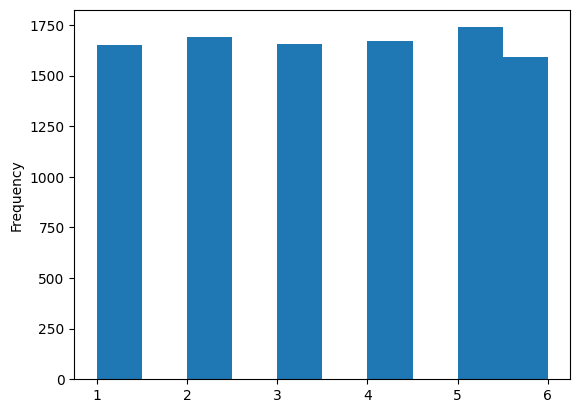

In [ ]:
pd.Series(data_uniform).plot(kind="hist")

In [ ]:
# membuat dummy data yang distribusinya uniform
n = 10000
low = 1
high = 5

# continuous
data_uniform = uniform.rvs(size=n, loc=low, scale=high)
data_uniform[:5]

array([4.40986864, 4.93862287, 5.62942907, 2.84667937, 4.82685202])

<Axes: ylabel='Frequency'>

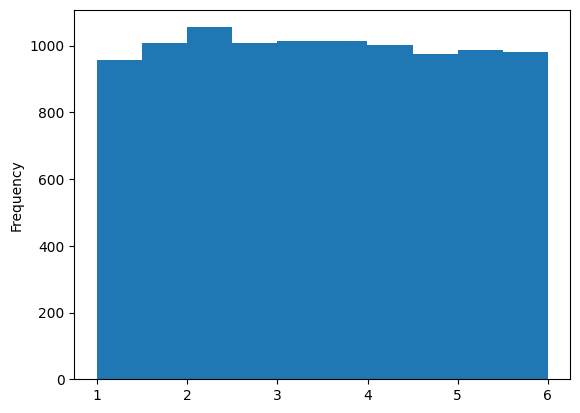

In [ ]:
pd.Series(data_uniform).plot(kind="hist", bins=10)

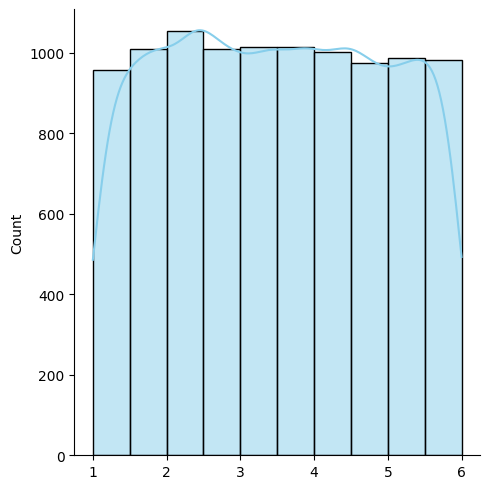

In [ ]:
# pakai seaborn

sns.displot(pd.Series(data_uniform),
            kde=True, # garis trend data
            color='skyblue', # warna bar dan garis kde
            bins=10, # jumlah bins
            )

begitulah uniform distribution, pembagian distribusi datanya untuk setiap kategori/ bin data hampir sama. rata. kemungkinan dapat satu kategori (discrete) atau suatu angka di sebuah range angka (continuous) adalah sama.

contoh continuous: nunggu bus antara 1-15 menit kemungkinan sama.

## Normal distribution
disebut juga sebagai Gaussian distribution

data ini, kalau kita ambil dari range mean +- 2* std, kita akan dapat 95% datanya di dalam range ini.

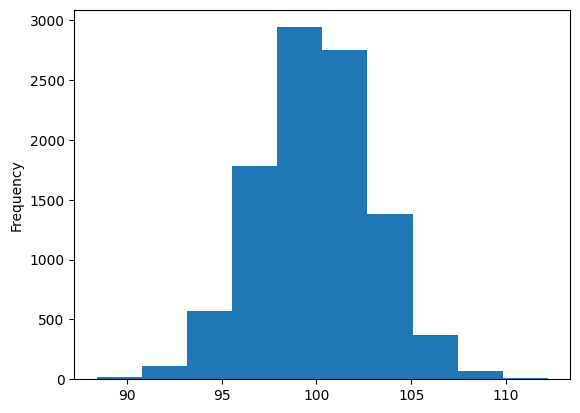

In [ ]:
# continuous
size = 10000
loc = 100
scale = 3
data_normal = scipy.stats.norm.rvs(size=n, loc=loc, scale=scale)

pd.Series(data_normal).plot(kind="hist")
plt.show()

In [ ]:
pd.Series(data_normal).std()

3.014849997072397

95% data di data_normal ada di antara 100 +- 2 * 3

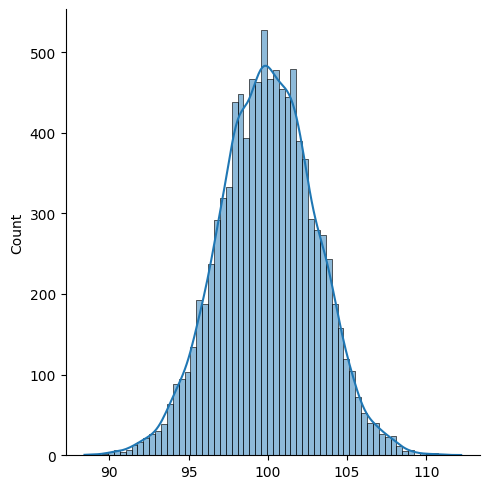

In [ ]:
sns.displot(data_normal, kde=True)

pelajari juga tipe distribusi lainnya seperti:
- gamma distribution
- exponential distribution
- poisson distribution (exponential distribution spesial)
- binomial distribution
- bernoulli distribution (binomial distribution spesial)

---

# Confidence Interval
1. membuat statement rata-rata
- nilai kelas A rata2 di 60-80
- tinggi lelaki Semarang ada di antara 160-180cm
- harga TV ada di antara 1-5jt

2. membuat statement proporsi
- 50-60% es krim yang dijual di bazaar rasanya vanilla
- 70-80% lelaki di Semarang lebih tinggi dari 150cm


best estimate +- margin of error
- best estimate
  - rata-rata: mean
  - proporsi: p
- margin of error
  - z * estimated standard error
    - z = 1.96 saat confidence di 95%
    - estimated standard error
      - rata-rata: std / np.sqrt(n)
      - proporsi: np.sqrt( p * (1-p) / n )
- n: jumlah data
- std: standard deviation

In [ ]:
# Contoh: Dataset Heart.csv dari https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv

df_heart = pd.read_csv("https://raw.githubusercontent.com/stefkwan-h8/dataset/main/heart.csv")
df_heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


### Dataset Heart.csv
diambil dari https://www.kaggle.com/ronitf/heart-disease-uci ini merupakan dataset tentang orang yang ke rumah sakit, tes darah, punya keluhan sakit dada, dan di diagnosa punya sakit jantung atau tidak.

beberapa kolomnya:

- age (umur)
- sex (gender, 1 = Pria, 0 = Wanita)
- chest pain type (tipe sakit di dada, ada 4 jenis)
- resting blood pressure (tekanan darah dalam mm Hg saat masuk rumah sakit)
- serum cholestoral in mg/dl (tingkat kolesterol dalam mg/dl)
- fasting blood sugar > 120 mg/dl (tingkat gula darah >= 120 mg/dl, 1 = ya, 0 = tidak)
- resting electrocardiographic results (hasil tes dcg untuk lihat ritme jantung, ada 3 jenis hasil 0,1,2)
- maximum heart rate achieved (maximum detak jantung)
- exercise induced angina (merasakan sakit dada saat olahraga? 1 = ya, 0 = tidak)
- target (0 = sehat; 1 = sakit jantung)

In [ ]:
df_heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


## Case Study - Confidence Interval - Mean
berapa rata-rata tingkat kolesterol wanita yang memiliki sakit jantung?

In [ ]:
# sex 0 = Wanita
# target 1 = sakit
wanita = df_heart['sex'] == 0
sakit = df_heart['target'] == 1

df_data = df_heart[wanita & sakit]
df_data['chol'].describe()

count    226.000000
mean     255.641593
std       65.539605
min      141.000000
25%      210.000000
50%      248.000000
75%      288.000000
max      564.000000
Name: chol, dtype: float64

In [ ]:
# confidence interval rata2 chol wanita sakit jantung

be = df_data['chol'].mean() # 255.641593 #
z = 1.96
std = df_data['chol'].std() # 65.539605 #
n = len(df_data['chol']) # 226 #
se = std / np.sqrt(n)
me = z * se

print("mean", be)
print("std", std)
print("n", n)

print(be - me, be + me)

mean 255.641592920354
std 65.53960529588362
n 226
247.09671871932827 264.1864671213797


para wanita yang memiliki sakit jantung, mempunyai tingkat kolesterol di antara 247 - 264

lalu, bagaimana dengan para wanita yang tidak memiliki sakit jantung? apakah tingkat kolesterol nya juga setinggi grup yang memiliki sakit jantung?

kita bisa cek confidence interval rata2 tingkat kolesterol wanita yang tidak memiliki sakit jantung

In [ ]:
# sex 0 = Wanita
# target 1 = sakit
wanita = df_heart['sex'] == 0
sehat = df_heart['target'] == 0

df_data = df_heart[wanita & sehat]
display(df_data['chol'].describe())

# confidence interval rata2 chol wanita sehat
be = df_data['chol'].mean()
z = 1.96
std = df_data['chol'].std()
n = len(df_data['chol'])
se = std / np.sqrt(n)
me = z * se

print("mean", be)
print("std", std)
print("n", n)

print(be - me, be + me)

count     86.000000
mean     276.732558
std       59.242359
min      164.000000
25%      230.000000
50%      268.000000
75%      319.000000
max      409.000000
Name: chol, dtype: float64

mean 276.7325581395349
std 59.242358537989006
n 86
264.2115532274979 289.25356305157186


kalau dari data yang kita miliki, wanita yang sehat justru memiliki tingkat kolesterol yang lebih tinggi, di atnara 264-289

## Case Study - Confidence Interval - Proportion
berapa persen pasien dari data kita, yang memiliki tingkat kolesterol diatas 200?

In [ ]:
# n = jumlah seluruh pasien
n = len(df_heart)
print(n, "seluruh pasien")

# p = jumlah pasien yang kolesterol diatas 200 / jumlah seluruh pasien
kon = df_heart["chol"] > 200
df_kol200 = df_heart[kon]

p = len(df_kol200) / n
print(len(df_kol200), "pasien kol > 200")
print(p, "proporsi paseian kol > 200 dibanding seluruh pasien")

1025 seluruh pasien
853 pasien kol > 200
0.8321951219512195 proporsi paseian kol > 200 dibanding seluruh pasien


In [ ]:
be = p

z = 1.96
se = np.sqrt( p * (1-p) / n )
me = z * se

print(be - me, be + me)

0.8093175983368008 0.8550726455656381


81-86% pasien yang cekup memiliki tingkat kolesterol diatas 200

# Latihan: Buatlah Confidence Interval untuk mencari proporsi pasien yang umurnya 60 tahun keatas

In [ ]:
df_lansia = df_heart[df_heart["age"]>=60]

n = len(df_heart)
p = len(df_lansia) / n

print(len(df_lansia), n, p)

309 1025 0.30146341463414633


In [ ]:
be = p
z = 1.96
se = np.sqrt( p * (1-p) / n )
me = z * se

print(be - me, be + me)

0.2733699032860805 0.32955692598221215


27.3-33.0% pasien yang cekup berumur 60 tahun keatas

# Hypothesis Testing
alternate hypothesis   
H1 = statement A

null hypothesis   
H0 = statement bukan A

kalkulasi **pvalue** --> reject H0 atau tidak berhasil reject H0
```python
alpha = 0.05 # 5% error rate, 95% confidence
if (pvalue < alpha):
  "reject null hypothesis H0"
else:
  "FAIL to reject null hypothesis H0"
```


### contoh - membuat alternate dan null hypothesis

Researcher - pasien operasi lutut terapi fisik 2x seminggu (bukan 3x), masa pemulihannya akan lebih lama dari 8.2 minggu.

alternate hypothesis    
statement A: pemulihan > 8.2 minggu

H1: μ > 8.2

null hypothesis   
statement B: pemulihan <= 8.2 minggu

H0: μ <= 8.2

# Case Study - One Population Proportion
- dulu 52% orang tua percaya x
- apakah sekarang lebih banyak? apakah sekarang lebih dari 52% orang tua percaya?

H0: p <= 0.52   
H1: p > 0.52

- n = 1018
- p = 0.56

dari 1018 orang tua yang di survey sekarang, 56% percaya x

apakah perbedaan ini signifikan? apakah kita bisa bilang kalau sekarang > 52% orang tua percaya x? atau mungkin cuma kebetulan yang di survey banyak yang bilang iya percaya x.

bayangkan kalau jumlah orang tua yang di survey cuma 10 orang, dan dibilang 50% percaya x.

jika pvalue yang kita cari lebih kecil dari error rate alpha kita (5%) kita bisa bilang kalau perbedaan ini signifikan.

In [ ]:
n = 1018
pnull = 0.52
phat = 0.56

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

print(pvalue)

0.005069273865860533


In [ ]:
alpha = 0.05 # error rate biasanya di 5%
if (pvalue < alpha):
  print("REJECT null hypothesis H0")
else:
  print("FAIL to reject null hypothesis H0")

REJECT null hypothesis H0


sepertinya H1 benar, kalau sekarang lebih banyak orang tua yang percaya x, lebih dari 52% orang tua percaya x

# Case Study - Hypothesis Testing - Difference in population means
perbedaan rata-rata antara dua set data

kita gunakan data heart.csv yang tadi, dan kita buat statement: rata2 kolesterol pria dan wanita berbeda.

H0: u_p == u_w

H1: u_p != u_w

set data chol_p dan set data chol_w

In [ ]:
df_chol_p = df_heart[df_heart['sex'] == 1]['chol']
print(df_chol_p.shape)

df_chol_w = df_heart[df_heart['sex'] == 0]['chol']
print(df_chol_w.shape)

(713,)
(312,)


In [ ]:
print("rata2 chol pria", df_chol_p.mean(), 'dari', len(df_chol_p), 'orang' )
print("rata2 chol wanita", df_chol_w.mean(), 'dari', len(df_chol_w), 'orang' )

rata2 chol pria 239.23702664796633 dari 713 orang
rata2 chol wanita 261.45512820512823 dari 312 orang


In [ ]:
zstat, pvalue = sm.stats.ztest(df_chol_p, df_chol_w, alternative="two-sided")
print(pvalue)

9.827887332708898e-11


In [ ]:
alpha = 0.05 # error rate biasanya di 5%
if (pvalue < alpha):
  print("REJECT null hypothesis H0")
else:
  print("FAIL to reject null hypothesis H0")

REJECT null hypothesis H0


ada perbedaan signifikan yang menunjukkan kalau H0 bisa kita REJECT, rata2 chol pria dan rata2 chol wanita sama kita REJECT, kemungkinan besar rata2 chol pria dan wanita berbeda

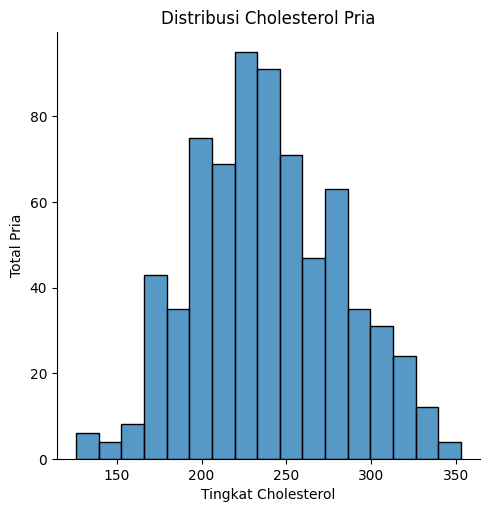

In [ ]:
sns.displot(df_chol_p)

plt.title("Distribusi Cholesterol Pria")
plt.ylabel("Total Pria")
plt.xlabel("Tingkat Cholesterol")
plt.show()

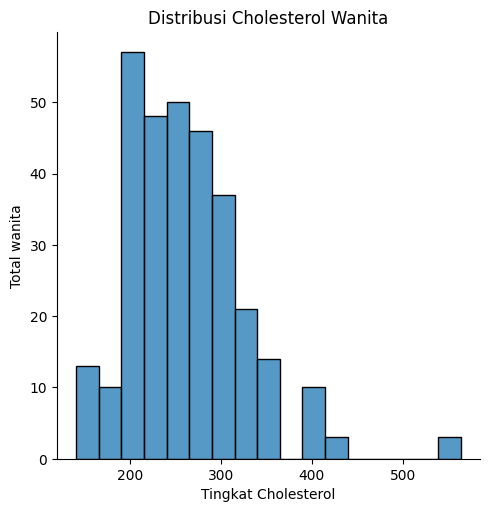

In [ ]:
sns.displot(df_chol_w)

plt.title("Distribusi Cholesterol Wanita")
plt.ylabel("Total wanita")
plt.xlabel("Tingkat Cholesterol")
plt.show()

In [ ]:
# latihan - coba kerjakan sesuai contoh kode.id,
# apakah dataset kita heart.csv (ceritanya org US) proporsi org sakit > 42% (proporsi org sakit di Irlandia)

df_sakit = df_heart[df_heart["target"] == 1]
n_sakit = len(df_sakit)
n = len(df_heart)

p = n_sakit / n

print("jumlah pasien", n)
print("jumlah sakit", n_sakit)
print("proporsi sakit", p)

jumlah pasien 1025
jumlah sakit 526
proporsi sakit 0.5131707317073171


- proporsi org US yang sakit ada di 0.51
- proporsi org Ireland yang sakit ada di 0.42
- apakah p_US > p_Ireland?

H0: p_US <= p_Ireland   
H1: p_US > p_Ireland

In [ ]:
n = n
pnull = 0.42
phat = 0.51

zstat, pvalue = sm.stats.proportions_ztest(phat * n, n, pnull, alternative='larger')

print(pvalue)

4.108029802635625e-09


In [ ]:
alpha = 0.05 # error rate biasanya di 5%
if (pvalue < alpha):
  print("REJECT null hypothesis H0")
else:
  print("FAIL to reject null hypothesis H0")

REJECT null hypothesis H0


sepertinya proporsi orang sakit di US lebih banyak daripada di Ireland.